## Decomposition of Time Series: Additive and Multiplicative model		

### Additive Model

### Additive Decomposition

* An additive model suggests that the components are added together.
* An additive model is linear where changes over time are consistently made by the same amount.
* A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). You need to specify whether the model is additive or multiplicative.

The seasonal_decompose() function returns a result object which contains arrays to access four pieces of data from the decomposition.

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

### Example 6

Perform additive model decomposition on Retail Turnover data

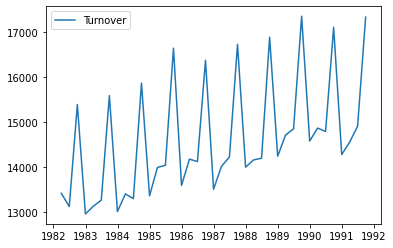

In [1]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm
import  pandas                   as pd

Turnover              = pd.read_csv('D:/RetailTurnover.csv')
date_rng              = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

plt.plot(Turnover.TimeIndex, Turnover.Turnover,label='Turnover')
plt.legend(loc='best')
plt.show()

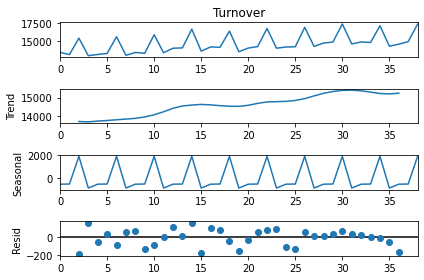

In [2]:
decompTurnover = sm.tsa.seasonal_decompose(Turnover.Turnover, model="additive", period=4)#the 'freq' parameter is going to
# be deprecated in future versions, hence using the 'period' parameter.
decompTurnover.plot()
plt.show()

Running the above code performs the decomposition, and plots the 4 resulting series.
We observe that the trend and seasonality are clearly separated.

In [3]:
trend = decompTurnover.trend
seasonal = decompTurnover.seasonal
residual = decompTurnover.resid
#plot the residuals separately if you want to get the residual graph instead of scatter points

In [4]:
print(trend.head(12))
print(seasonal.head(12))
print(residual.head(12))

0            NaN
1            NaN
2     13692.5375
3     13674.1875
4     13716.7375
5     13748.1500
6     13789.3500
7     13827.8875
8     13866.6500
9     13944.9125
10    14062.1375
11    14228.4125
Name: trend, dtype: float64
0     -524.613498
1     -510.713672
2     1894.960113
3     -859.632943
4     -524.613498
5     -510.713672
6     1894.960113
7     -859.632943
8     -524.613498
9     -510.713672
10    1894.960113
11    -859.632943
Name: seasonal, dtype: float64
0            NaN
1            NaN
2    -188.697613
3     149.645443
4     -58.624002
5      34.263672
6     -88.010113
7      49.745443
8      67.263498
9    -129.998828
10    -83.197613
11     -2.279557
Name: resid, dtype: float64


### Example 7

### Decomposition of TS: Multiplicative model	

### Multiplicative Decomposition

* An additive model suggests that the components are multipled together.
* An additive model is non-linear such as quadratic or exponential. 
* Changes increase or decrease over time.
* A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

Perform multiplicative model decomposition on International Air Passengers Data.

In [5]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

  Year-Month  Pax
0   1949-Jan  112
1   1949-Feb  118
2   1949-Mar  132
3   1949-Apr  129
4   1949-May  121
DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
  Year-Month  Pax  TimeIndex
0   1949-Jan  112 1949-01-31
1   1949-Feb  118 1949-02-28
2   1949-Mar  132 1949-03-31
3   1949-Apr  129 1949-04-30
4   1949-May  121 1949-05-31


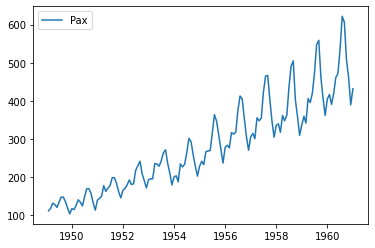

In [6]:
#Load the air passengers data
AirPax = pd.read_csv('D:/AirPassenger.csv')
print(AirPax.head())

date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

plt.plot(AirPax.TimeIndex, AirPax.Pax,label='Pax')
plt.legend(loc='best')
plt.show()

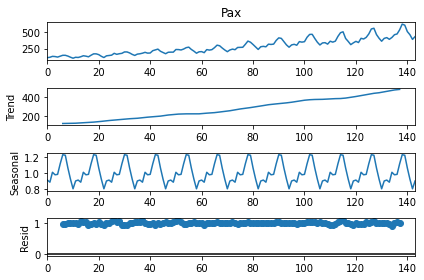

In [7]:
decompAirPax = sm.tsa.seasonal_decompose(AirPax.Pax, model="multiplicative", period=12)
decompAirPax.plot()
plt.show()

Running the above code performs the decomposition, and plots the 4 resulting series.
We observe that the trend and seasonality are clearly separated.

In [8]:
seasonal = decompAirPax.seasonal
seasonal.head(4)

0    0.910230
1    0.883625
2    1.007366
3    0.975906
Name: seasonal, dtype: float64

## Visualization of Seasonality - Month plots

Let us use retail turnover data and observe seasonality using visualization techniques.

In [9]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    statsmodels.tsa.seasonal import   seasonal_decompose
from    datetime                 import   datetime
import  statsmodels.api          as       sm

Turnover              = pd.read_csv('D:/RetailTurnover.csv')
date_rng              = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

quarterly_turnover = pd.pivot_table(Turnover, values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turnover

Quarter,Q1,Q2,Q3,Q4
Year,,,,
1982,NaN,NaN,13423.2,13128.8
1983,15398.8,12964.2,13133.5,13271.7
1984,15596.3,13018.0,13409.3,13304.2
1985,15873.9,13366.5,13998.6,14045.1
1986,16650.3,13598.4,14183.2,14128.5
1987,16380.7,13512.8,14022.1,14231.8
1988,16737.0,14004.5,14165.5,14203.9
1989,16895.1,14248.2,14719.5,14855.8
1990,17361.6,14585.2,14873.5,14798.4


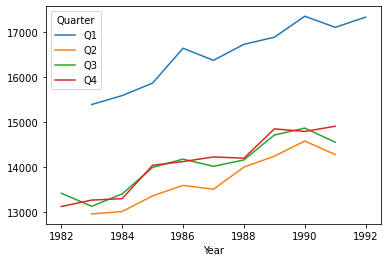

In [10]:
quarterly_turnover.plot()
plt.show()

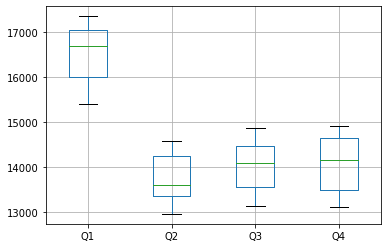

In [11]:
quarterly_turnover.boxplot()
plt.show()

### Observation

We see very clearly that the turnover is high in Quarter 1 and very low in quarter 2.

### Seasonal Indices

* Seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. 
* Seasonality may be caused by various factors, such as weather, vacation, and holidays and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.


# END